In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def cc(i):
    return cv2.cvtColor(i,cv2.COLOR_BGR2RGB)

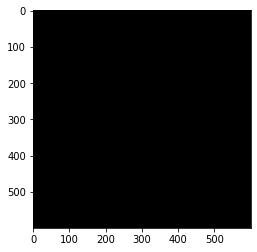

In [2]:
black= np.zeros((600,600), dtype=np.uint8)
plt.imshow(black, cmap='gray')

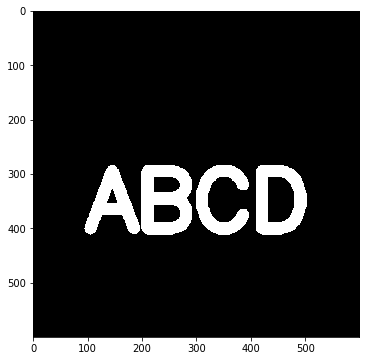

In [3]:
b_txt = cv2.putText(black.copy(), 'ABCD',(100,400),cv2.FONT_HERSHEY_SIMPLEX, 5, (255,255,255), thickness=22)
plt.figure(figsize=(6,6))
plt.imshow(b_txt, cmap='gray')

In [20]:
kernel =np.ones((5,5), dtype=np.uint8)

In [5]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

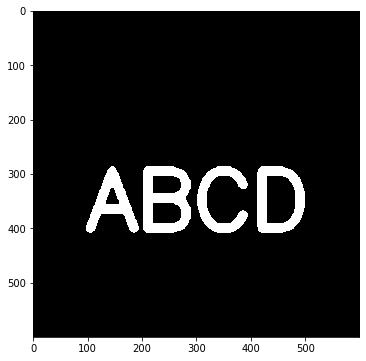

In [6]:
erode = cv2.erode(b_txt.copy(), kernel, iterations=1)
plt.figure(figsize=(6,6))
plt.imshow(erode, cmap='gray')

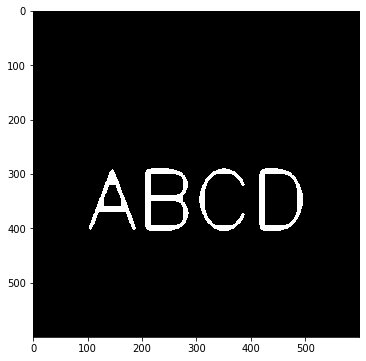

In [7]:
erode = cv2.erode(b_txt.copy(), kernel, iterations=3)
plt.figure(figsize=(6,6))
plt.imshow(erode, cmap='gray')

In [8]:
b_txt.shape

(600, 600)

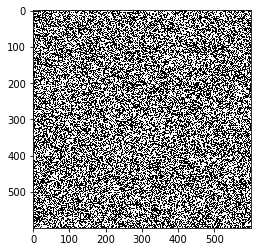

In [9]:
noise = np.random.randint(low=0,high=2,size=(600,600))
plt.imshow(noise, cmap='gray')

In [10]:
noise

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1]])

In [11]:
noise =noise*255

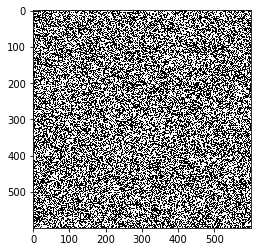

In [12]:
plt.imshow(noise, cmap='gray')

In [13]:
noise

array([[  0,   0,   0, ..., 255,   0,   0],
       [255,   0,   0, ..., 255, 255, 255],
       [255,   0, 255, ...,   0, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [  0, 255, 255, ...,   0, 255,   0],
       [  0,   0,   0, ..., 255,   0, 255]])

In [14]:
f_noise = noise + b_txt.copy()

In [15]:
f_noise

array([[  0,   0,   0, ..., 255,   0,   0],
       [255,   0,   0, ..., 255, 255, 255],
       [255,   0, 255, ...,   0, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [  0, 255, 255, ...,   0, 255,   0],
       [  0,   0,   0, ..., 255,   0, 255]])

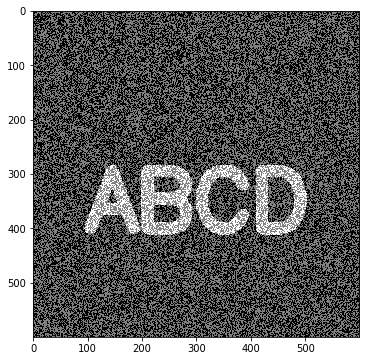

In [16]:
plt.figure(figsize=(6,6))
plt.imshow(f_noise, cmap='gray')

In [24]:
#Remove background noise

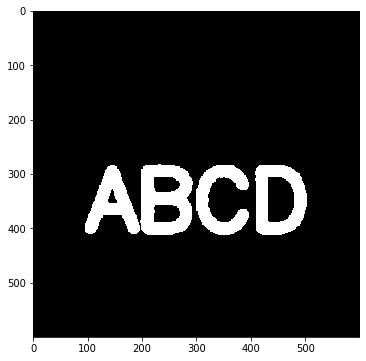

In [23]:
opening = cv2.morphologyEx(f_noise.copy().astype('uint8'), cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(6,6))
plt.imshow(opening, cmap='gray')

In [25]:
#Add foreground noise

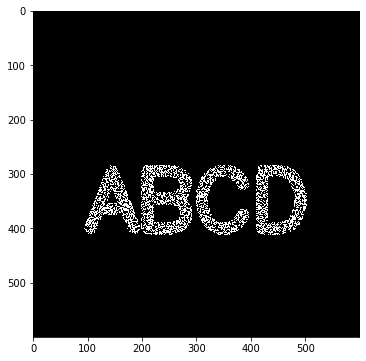

In [26]:
fore_noise = np.random.randint(0,2,(600,600))
fore_noise = fore_noise* -255
fore_noise_img = b_txt.copy() + fore_noise
fore_noise_img[fore_noise_img == -255] = 0
plt.figure(figsize=(6,6))
plt.imshow(fore_noise_img, cmap='gray')

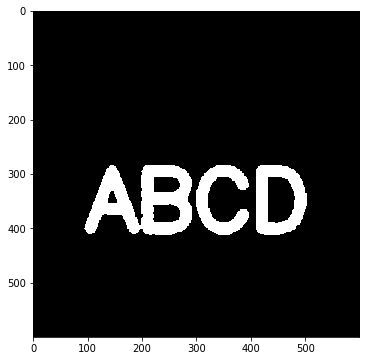

In [28]:
close = cv2.morphologyEx(fore_noise_img.copy().astype('uint8'), cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(6,6))
plt.imshow(close, cmap='gray')

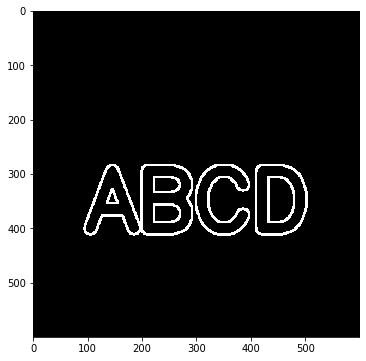

In [29]:
gradient = cv2.morphologyEx(b_txt.copy(), cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(6,6))
plt.imshow(gradient, cmap='gray')